In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
#import cechmate as cm
from persim import plot_diagrams 
import time




<IPython.core.display.Javascript object>


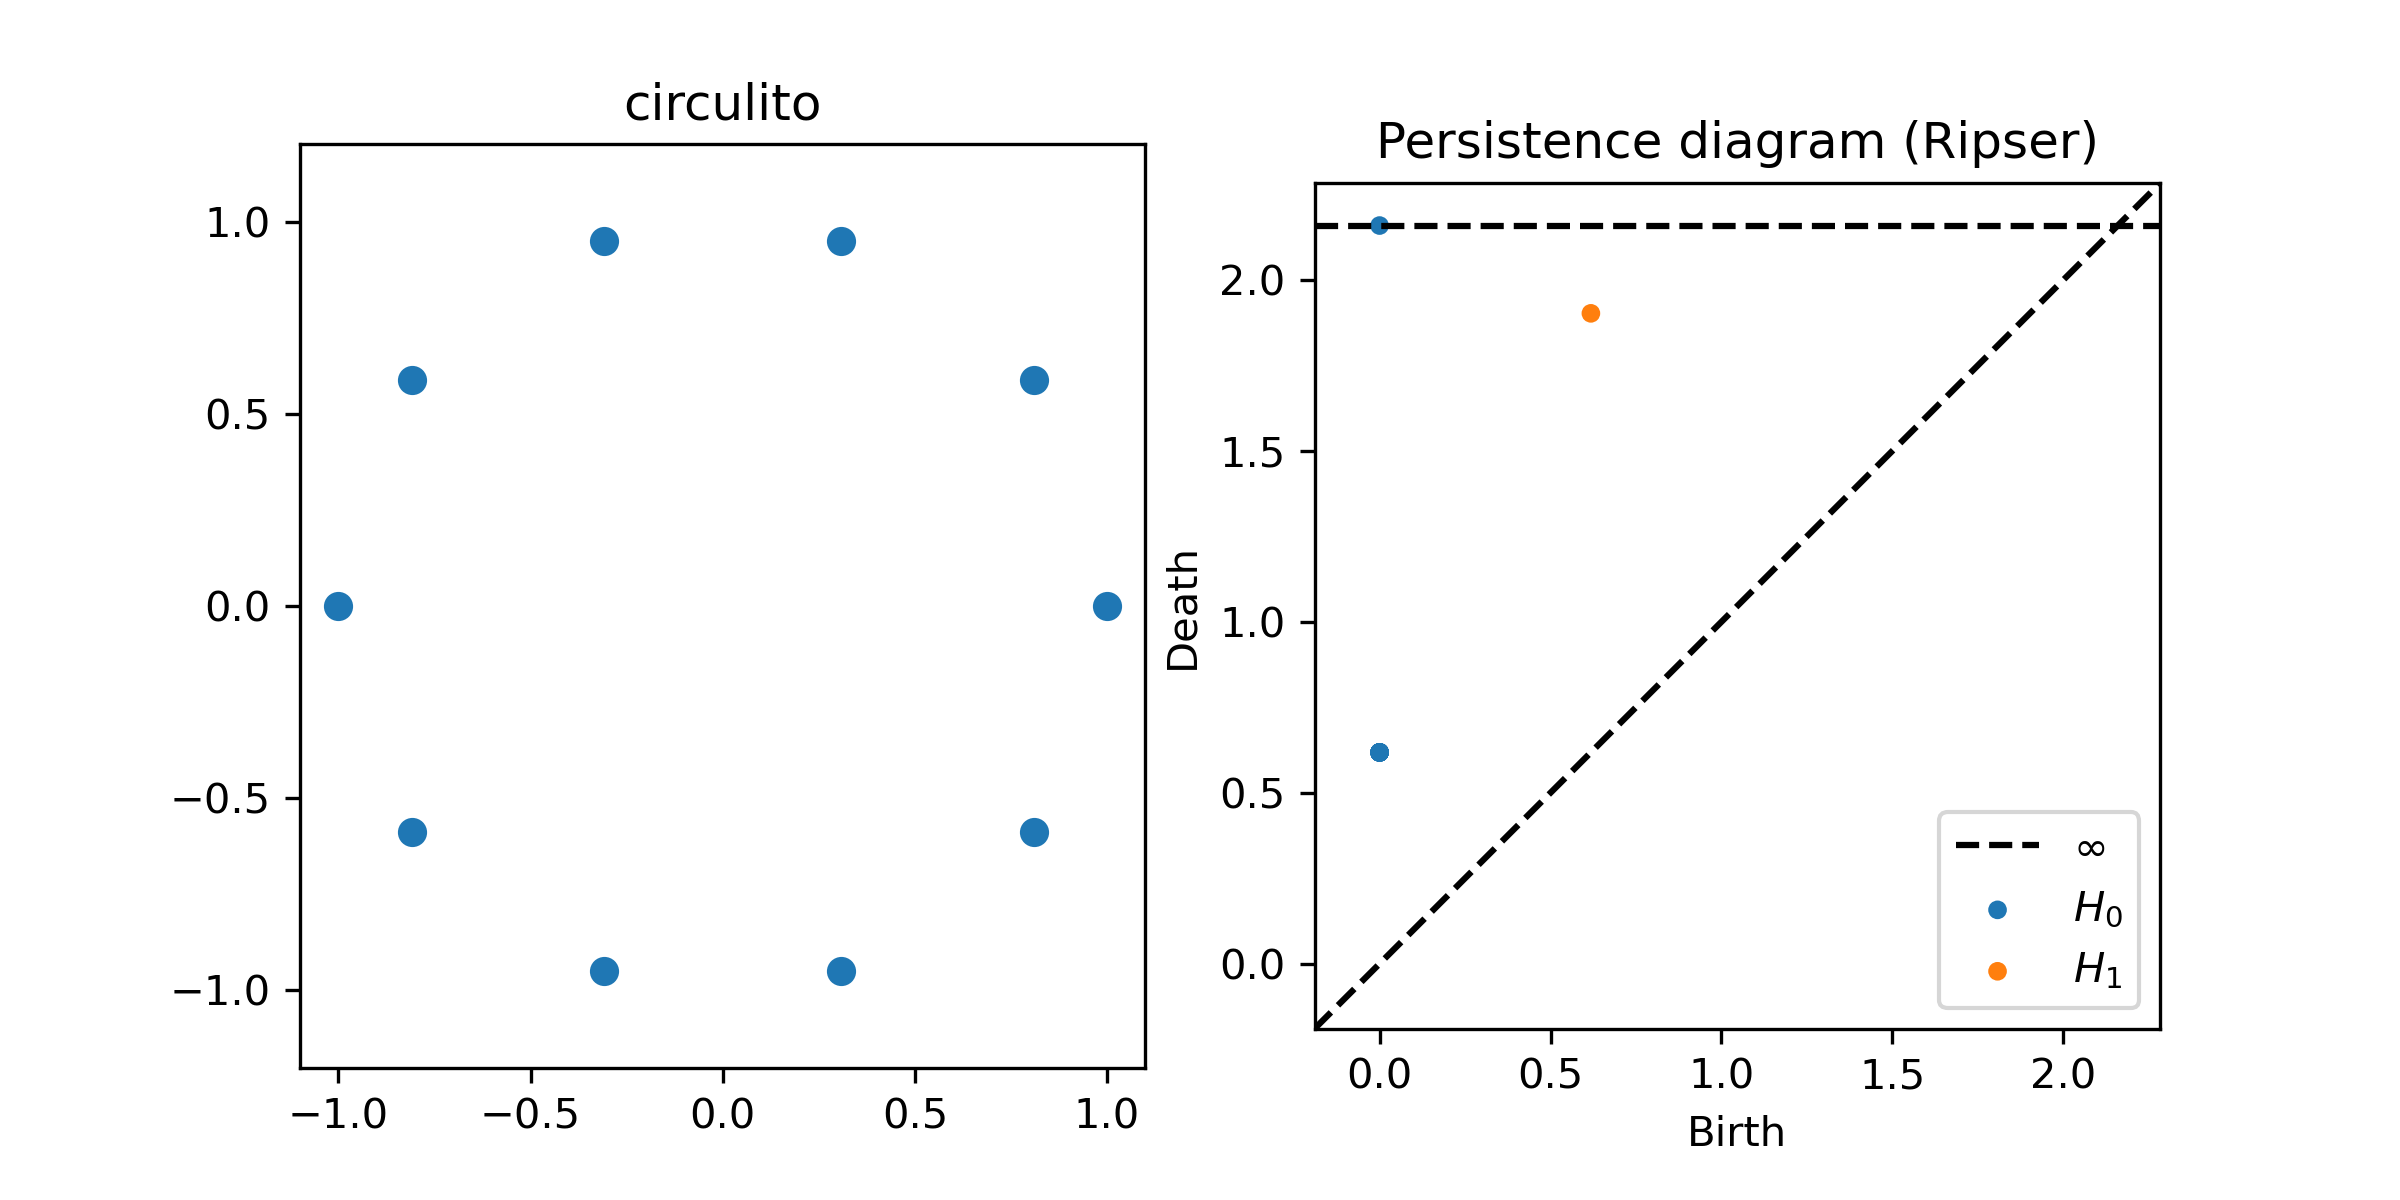

In [2]:
n=10
t=np.linspace(0,2*np.pi,n+1)[0:n]
x=np.zeros((n,2))
x[:,0]=np.cos(t)
x[:,1]=np.sin(t)

dgms=ripser(x)['dgms']

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')
plt.title('circulito')
plt.subplot(122)
plot_diagrams(dgms)
plt.title('Persistence diagram (Ripser)')
plt.show()

Hay que observar que (n) controla el numero de puntos que van a formar el circulo. El punto naranja nos marca el tiempo que le toma a la persistencia homogica determinar el circulo. Es decir el punto se desplazara de izquierda a derecha. 

# Example 2


Se va a graficar de manera aleatoria algunos puntos en una esfera de dos
dimenciones y se aplicara una persistencia homologica de dos dimensiones. Para 
esto se utilza "intrinsic metric" que es la longitud de arco entre puntos. 
El punto X=(x,y,z) se dibuja de la forma gaussiana en 3D

$$(x,y,z)= (\frac{1}{2\pi})^\frac{1}{2}*exp(-(x^2+y^2+z^2)/2)$$

y finalmente la normalizaremos para obtener una longitud de 1.

Hay que notar que la longitud de arco del circulo unitario es igual al angulo 
sostenido del circulo en radianes. Asi, dados dos vectores en la esfera, x1 y x2
en la esfera x1 y x2, la longitud de arco entre ellos es $$arcos(x1,x2)$$

<IPython.core.display.Javascript object>


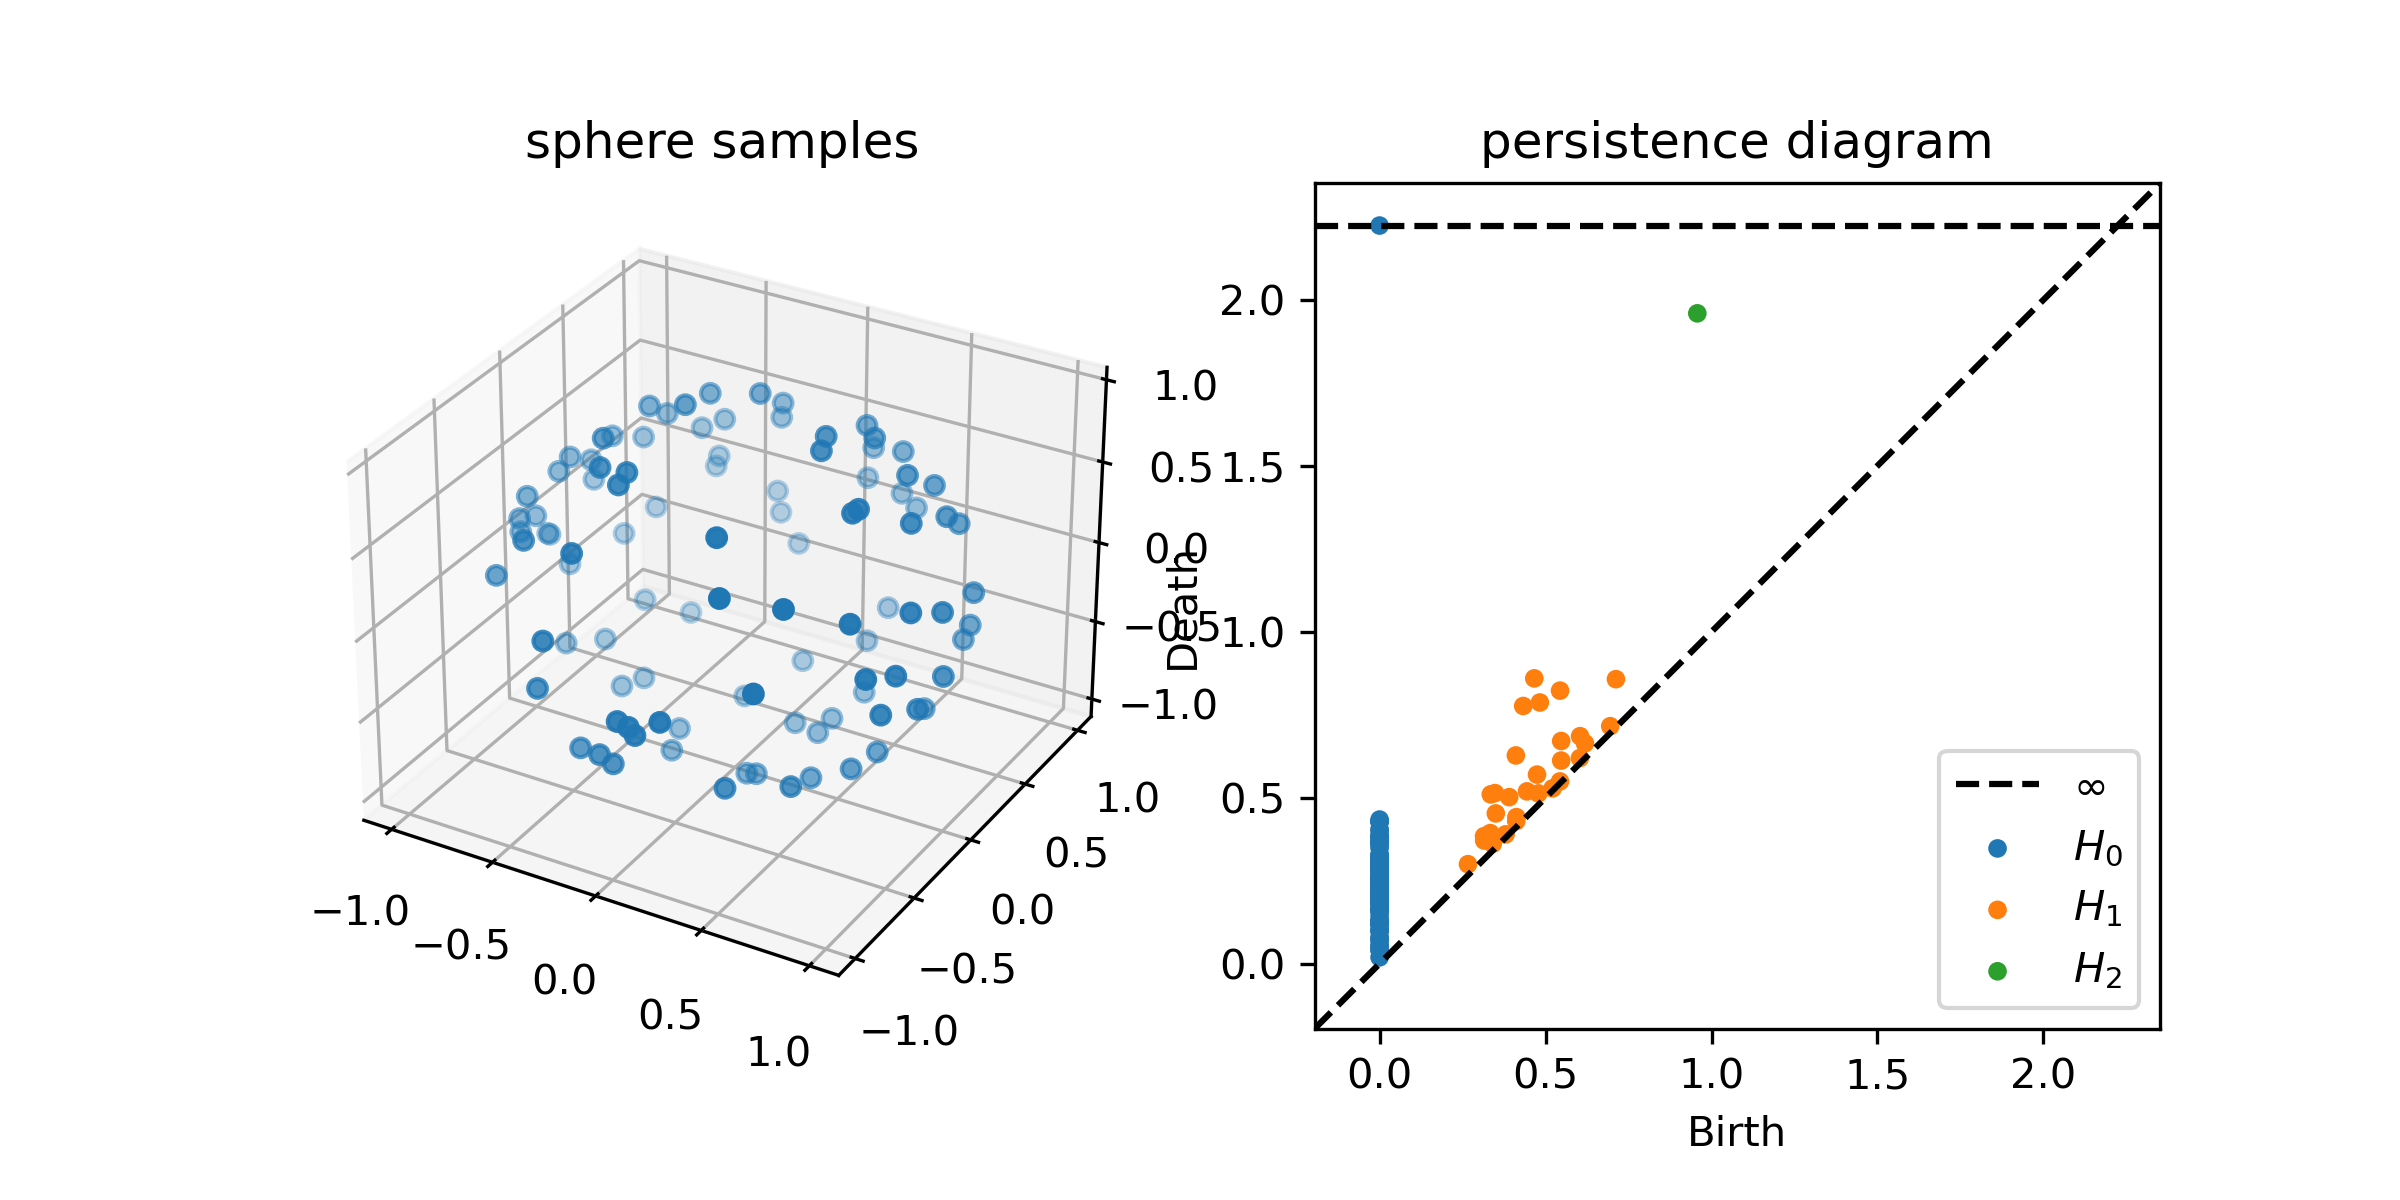

Text(0.5, 1.0, 'persistence diagram')

In [3]:
n=100
x=np.random.randn(n,3)
x=x/np.sqrt(np.sum(x**2,1))[:,None]

prod_punto=x.dot(x.T)

prod_punto[prod_punto<-1]=-1
prod_punto[prod_punto>1]=1

Dsphere=np.arccos(prod_punto)
np.fill_diagonal(Dsphere,0)

tic=time.time()
dgms=ripser(Dsphere,distance_matrix=True,maxdim=2)['dgms']
fig=plt.figure(figsize=(8,4))

ax=plt.subplot(121,projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2])
plt.title('sphere samples')

plt.subplot(122)
plot_diagrams(dgms)
plt.title('persistence diagram')


<IPython.core.display.Javascript object>


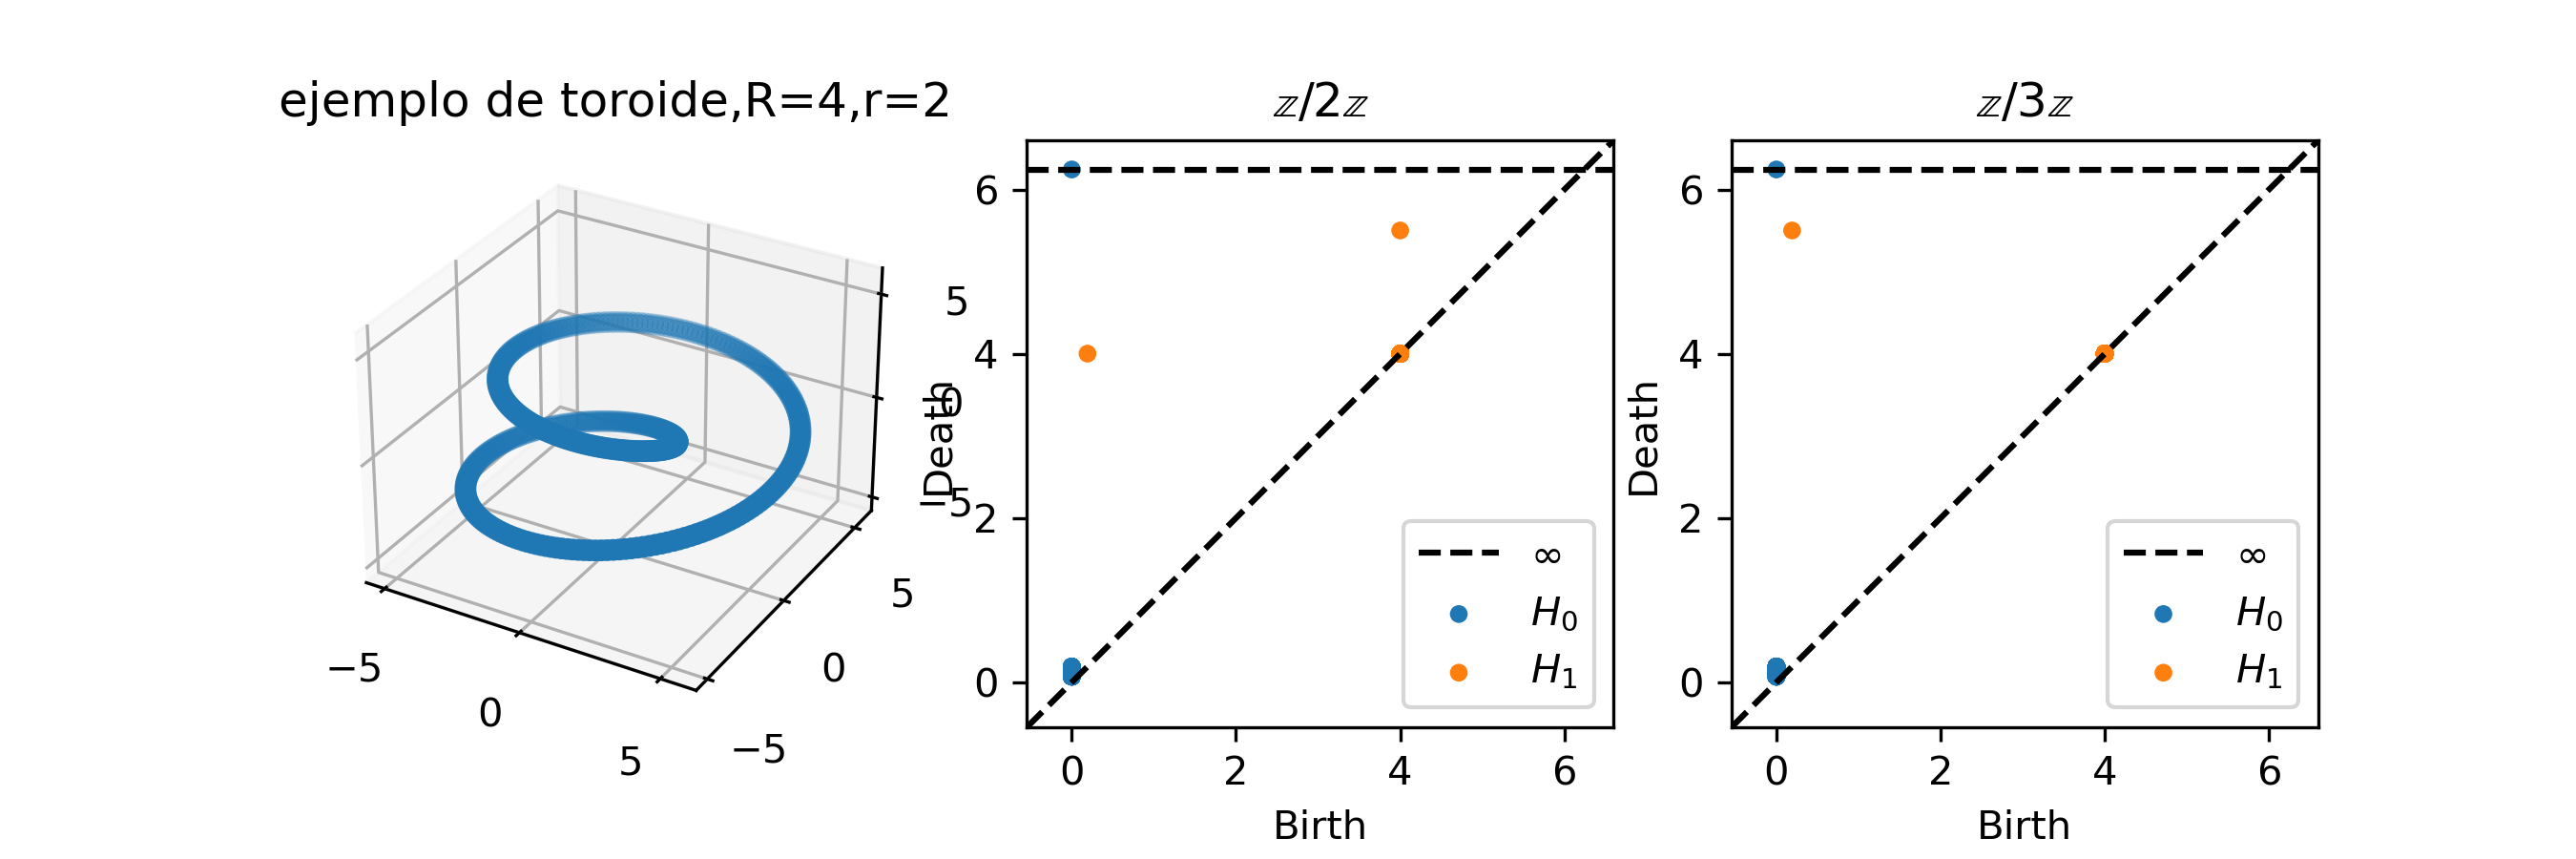

In [4]:

n=400
R=4
r=2
teta=np.linspace(0,2*np.pi,n+1)[0:n]
pi=teta*2
x=np.zeros((n,3))
x[:,0]=(R+r*np.cos(teta))*np.cos(pi)
x[:,1]=(R+r*np.cos(teta))*np.sin(pi)
x[:,2]=r*np.sin(teta)
xr=[np.min(x.flatten()),np.max(x.flatten())]

#ahora se grafican los diagramas de persistencia con los coeficientes  de z/2
dg2=ripser(x,maxdim=1,coeff=2)['dgms']
dg3=ripser(x,maxdim=1,coeff=3)['dgms']

plt.figure(figsize=(9,3))
ax=plt.subplot(131,projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2])
ax.set_xlim(xr)
ax.set_ylim(xr)
ax.set_zlim(xr)
plt.title('ejemplo de toroide,R=%g,r=%g'%(R,r))
plt.subplot(132)
plot_diagrams(dg2)
plt.title('$\mathbb{z}/2\mathbb{z}$')
plt.subplot(133)
plot_diagrams(dg3)
plt.title('$\mathbb{z}/3\mathbb{z}$')
plt.show()



# Ahora vamos a analizar ejemplos en los que tenemos ruido

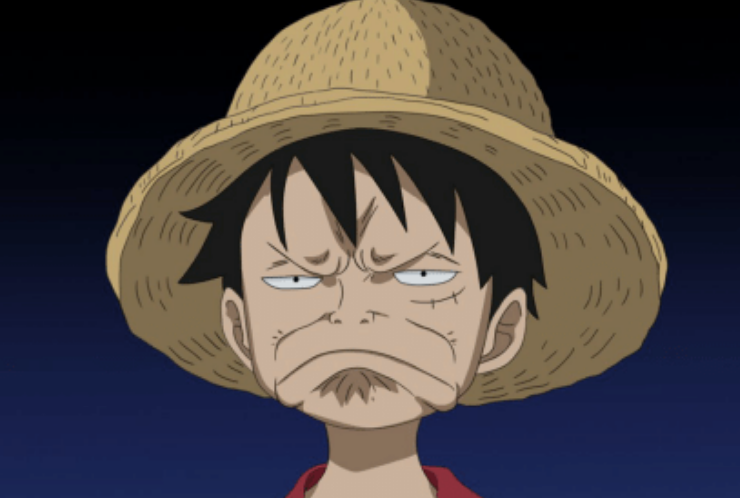

In [8]:

import ipywidgets as wg

#import Ipython.display
from IPython.display import display
name = wg.Text (value = 'Name')
age = wg.IntSlider (description = 'Age: ')
display (name, age)
print (name.value + 'is already'+ str (age.value) + 'now' )

Text(value='Name')

IntSlider(value=0, description='Age: ')

Nameis already0now


In [3]:

# en este programa vamos a implementar nuestra primera red neuronal y entrenarla
#con esto seguimos con el ejemplo anterior. La red neuronal aprendera a calcular la 
#suma de dos numeros.
## esto lo usare para marcar las nuevas partes agrgadas al codigo anterior.


import numpy as np
from random import random


### Plan para hoy ###

## Save activations and derivatives
##implement backpropagation
##implement gradient descent
##implement train
##implement our net with some dummy dataset
##make some predictions



#multilayer perception
class MLP(object):
    
    def __init__(self, num_inputs=3, hidden_layers=[3,3], num_outputs=2):
        
        """constructor for the MLP. Takes the number of inputs, a variable number of
        hidden layers, and a number of outputs.
    
        Args:
        num_inputs(int): number of inputs
        hidden_layers(list): A list of ints for the hidden layers
        num_output(int): number of outputs"""    
        
        
        
        
        self.num_inputs=num_inputs
        self.num_hidden=hidden_layers
        self.num_outputs=num_outputs
        
        layers=[num_inputs] + hidden_layers + [num_outputs]
        
        #initiate random weights 
        weights=[]
        for i in range(len(layers)-1):
            
            #we are creating a random array which in turn is a matrix
            w = np.random.rand(layers[i],layers[i+1])
            weights.append(w)
        self.weights=weights
            
        activations=[]
        
        for i in range(len(layers)):
            a=np.zeros(layers[i])
            activations.append(a)
        self.activations=activations    
            
        derivatives=[]    
        
        for i in range(len(layers)-1):
            d=np.zeros((layers[i],layers[i+1]))
            derivatives.append(d)
        self.derivatives = derivatives
        
   
    #inputs traveling from right to left to give us a result        
    def forward_propagate(self,inputs):
        
        """computes forward propagation of the network based on the input signals
        Args:
            inputs(narray): input signal
            
        Returns:
            activations(narray):output values"""
        
        ##the input layer activation is just the input itself
        activations = inputs
        
        ##save activations for backpropagation
        self.activations[0]=activations
    
        for i,w in enumerate(self.weights):
            #calculate the net inputs
            net_inputs=np.dot(activations,w)
        
            #calculate the activation
            activations=self._sigmoid(net_inputs)
            self.activations[i+1]=activations
        
        #return the output layer activation
        return activations
    
    
    
    def back_propagate(self,error,verbose=False):
        
        #dE/dW_i=(y-a_[i+1])s'(h_[i+1])a_i
        #s'(h_[i+1])=s(h_[i+1])(1-s(h_[i+1]))
        #s(h_[i+1])=a_[i+1]
        #dE/dW_[i-1] = (y-a_[i+1])s'(h_[i+1])a_[i-1]
        
        
        for i in reversed(range(len(self.derivatives))):
            ##get activation for previous layer
            activations=self.activations[i+1]
            
            ##apply sigmoid derivative function
            delta= error*self._sigmoid_derivative(activations)
            
            ##reshape delta to have it as a 2D array
            delta_reshaped=delta.reshape(delta.shape[0],-1).T
            
            #get activations for current layer
            current_activations=self.activations[i] # ndarray[0.1,0.2]-->narray([[0.1],[0.2]])
            
            ##reshape activations to get them as a 2D column matrix
            current_activations_reshaped=current_activations.reshape(current_activations.shape[0],-1)
            
            ##Save derivatives after applying matrix multiplication
            self.derivatives[i]=np.dot(current_activations_reshaped,delta_reshaped)
            
            ##back propagate to the next error
            error=np.dot(delta,self.weights[i].T)
            
            if verbose:
                print("Derivatives for w{}:{}".format(i,self.derivatives[i]))
        
        return error
    
    
    def gradient_descent(self,learnig_rate):
        for i in range (len(self.weights)):
            weights =self.weights[i]
            
            print("original w{} {}".format(i,weights))
            derivatives = self.derivatives[i]
            weights+=derivatives*learning_rate
            
            print("updated w{} {}".format(i,weights))
        
            
    def _sigmoid_derivative(self,x):
        return x*(1-x)
        
        
        
    
    def _sigmoid(self,x):
        
        """sigmoid activation function 
        args:
            x(float):value to be processed 
        Returns:
            y(float): output"""
        
        
        return 1/(1+np.exp(-x))
            
            
if __name__ == "__main__":
    
    
    #create an MLP
    mlp=MLP(2,[5],1)
     
    ##create a dummy data
    input = np.array([0.1,0.2])
    target=np.array([0.3])
    
    ##forward propagation
    
    output=mlp.forward_propagate(input)
    
    ##calculate error
    error= target-output
    
    ##back propagation
    mlp.back_propagate(error)
    
    ##apply gradient decent
    learning_rate=0.1
    
    mlp.gradient_descent(learning_rate)
   
    
    #create some inputs
   
   # inputs=np.random.rand(mlp.num_inputs)
    
    #perform forward prop
    #outputs=mlp.forward_propagate(inputs)
    
    #print the results
    
    #print("The network input is: {}".format(inputs))
    #print("The network output is: {}".format(outputs))
    
print('\n\naqui termina el ejemplo')
    
            
            

original w0 [[0.34390581 0.86107009 0.70516185 0.35447185 0.56690033]
 [0.26819526 0.74185115 0.81946471 0.98904442 0.61659213]]
updated w0 [[0.34376693 0.86098974 0.70506298 0.354325   0.56681348]
 [0.2679175  0.74169046 0.81926698 0.98875072 0.61641843]]
original w1 [[0.91374724]
 [0.53487571]
 [0.65816529]
 [0.97751767]
 [0.57493381]]
updated w1 [[0.91056759]
 [0.53147458]
 [0.65476427]
 [0.97411837]
 [0.57161474]]


aqui termina el ejemplo


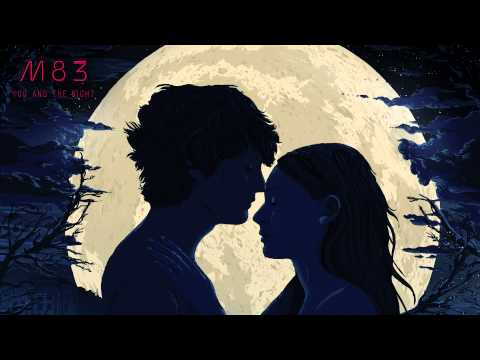

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("36mlX318Q3w", width=600, height=400)
